In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data cleaning

## Removing unknown values

In [2]:
df = pd.read_csv(
    "../data/realtor-data.csv",
    dtype={"status": "category", "city": "category", "state": "category", "zip_code": "category", "bed": "Int32", "bath": "Int32"},
    parse_dates=["prev_sold_date"]
)
df[["house_size", "acre_lot"]] = df[["house_size", "acre_lot"]] / 10.764
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3,2,0.011148,Adjuntas,Puerto Rico,601.0,85.470085,NaT,105000.0
1,for_sale,4,2,0.007432,Adjuntas,Puerto Rico,601.0,141.861761,NaT,80000.0
2,for_sale,2,1,0.013935,Juana Diaz,Puerto Rico,795.0,69.490896,NaT,67000.0
3,for_sale,4,2,0.009290,Ponce,Puerto Rico,731.0,167.224080,NaT,145000.0
4,for_sale,6,2,0.004645,Mayaguez,Puerto Rico,680.0,NaN,NaT,65000.0
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2,2,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2,2,NaN,Bronx,New York,10463.0,111.482720,NaT,299000.0
904963,for_sale,<NA>,1,NaN,Bronx,New York,10463.0,NaN,NaT,120000.0
904964,for_sale,3,2,NaN,Bronx,New York,10463.0,NaN,NaT,449000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   status          904966 non-null  category      
 1   bed             775126 non-null  Int32         
 2   bath            791082 non-null  Int32         
 3   acre_lot        638324 non-null  float64       
 4   city            904894 non-null  category      
 5   state           904966 non-null  category      
 6   zip_code        904762 non-null  category      
 7   house_size      612080 non-null  float64       
 8   prev_sold_date  445865 non-null  datetime64[ns]
 9   price           904895 non-null  float64       
dtypes: Int32(2), category(4), datetime64[ns](1), float64(3)
memory usage: 41.6 MB


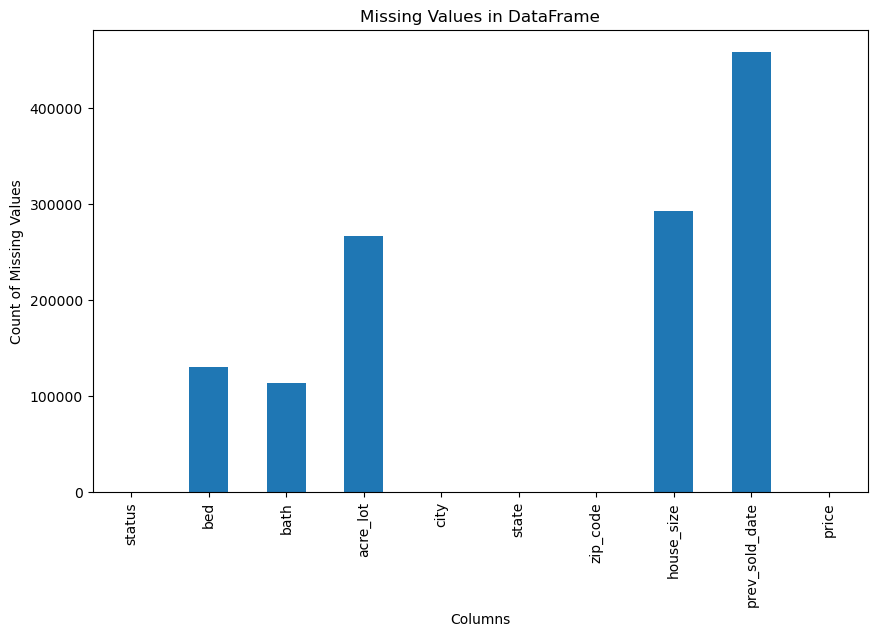

In [4]:
df.isna().sum().plot.bar(figsize=(10, 6))
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in DataFrame')
plt.show()

Remove NA prices, entries without ground truth are not useful, at least in the fully-supervised paradigm.

In [5]:
df.dropna(subset = ["price"], inplace=True)

Let's see the importance of the "prev_sold_date" attribute, as it has a lot of missing values.

<AxesSubplot:xlabel='price', ylabel='prev_sold_date'>

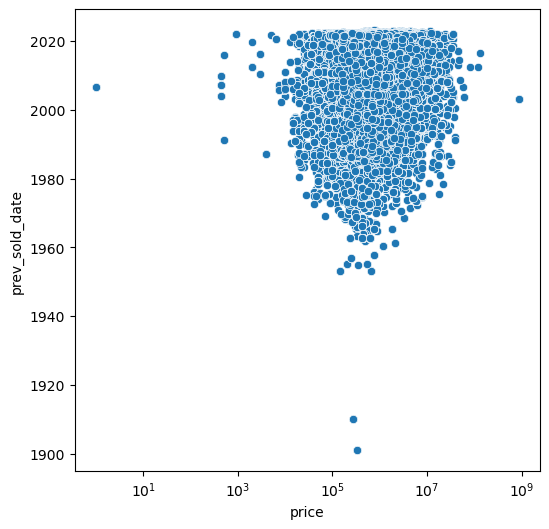

In [6]:
f, ax = plt.subplots(figsize=(6, 6))
ax.set(xscale="log")
sns.scatterplot(df, x="price", y="prev_sold_date")

It doesn't seem to be all that important, the mean doesn't really vary. We will remove this column.

In [7]:
df.drop(["prev_sold_date"], axis=1, inplace=True)

Let's see how many missing values we still have.

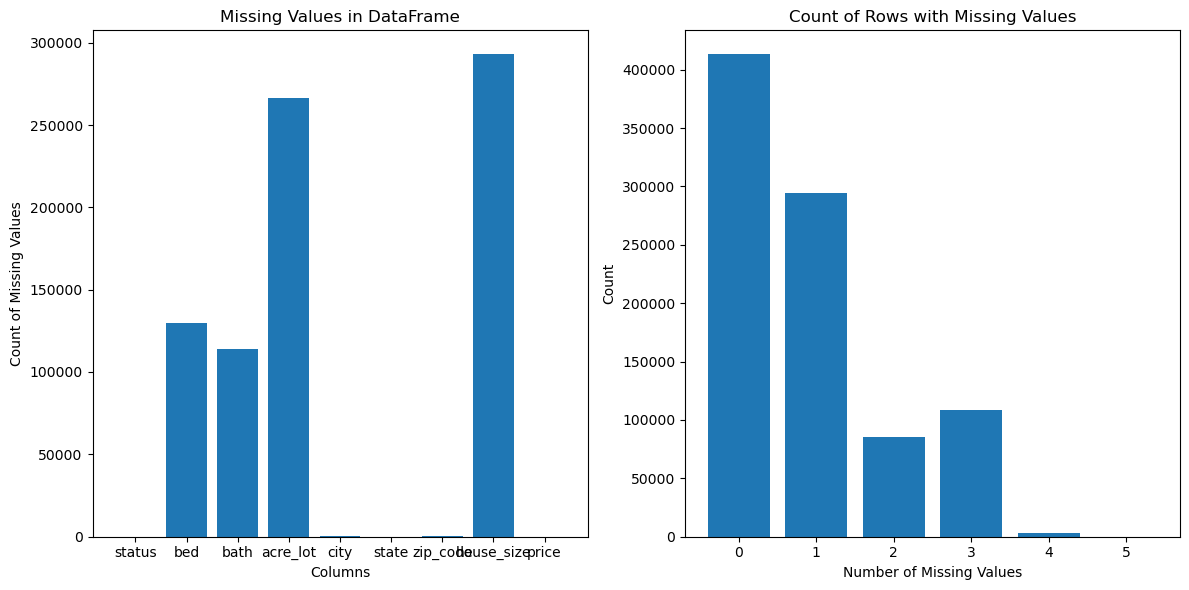

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: df.isna().sum()
axes[0].bar(df.columns, df.isna().sum())
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Count of Missing Values')
axes[0].set_title('Missing Values in DataFrame')

# Plot 2: df.isna().sum(axis=1).value_counts()
axes[1].bar(df.isna().sum(axis=1).value_counts().index, df.isna().sum(axis=1).value_counts().values)
axes[1].set_xlabel('Number of Missing Values')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Rows with Missing Values')

plt.tight_layout()
plt.show()


Since we have plenty of data without NA values, sufficient to give us trouble computationally, we will just remove those rows.

In [9]:
df.dropna(inplace=True)

## Handling categorical columns

The "status" column can be one-hot encoded.

In [10]:
# one-hot encode "status"
df = pd.concat([df, pd.get_dummies(df["status"], prefix="status").astype("float")], axis=1).drop(["status"], axis=1)
df

,bed,bath,acre_lot,city,state,zip_code,house_size,price,status_for_sale,status_ready_to_build
0,3,2,0.011148,Adjuntas,Puerto Rico,601.0,85.470085,105000.0,1.0,0.0
1,4,2,0.007432,Adjuntas,Puerto Rico,601.0,141.861761,80000.0,1.0,0.0
2,2,1,0.013935,Juana Diaz,Puerto Rico,795.0,69.490896,67000.0,1.0,0.0
3,4,2,0.009290,Ponce,Puerto Rico,731.0,167.224080,145000.0,1.0,0.0
5,4,3,0.042735,San Sebastian,Puerto Rico,612.0,234.113712,179000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
904934,4,8,0.416202,Armonk,New York,10504.0,836.120401,5600000.0,1.0,0.0
904935,6,8,0.314939,Armonk,New York,10504.0,704.570792,3650000.0,1.0,0.0
904936,4,5,0.118915,Armonk,New York,10504.0,397.621702,2449000.0,1.0,0.0
904937,4,7,0.366035,Armonk,New York,10504.0,632.292828,4999999.0,1.0,0.0


`city`, `zip_code` and `state` are more difficult, as there are a great number of categories. However, we know that given a particular geographical place, the best prediction we can make is the mean price of that place. Thus, I will just compute the mean for each category. 

However, we should note that when testing our model, we must calculate this mean for the training set only, and then use those values for the test set. Otherwise, we get *data leakage*. Doing this, we might get unknown values on the test set. To impute them, I will try to use a KNN imputer.

In [11]:
df["city"] = df["city"].cat.remove_unused_categories()
df["state"] = df["state"].cat.remove_unused_categories()
df["zip_code"] = df["zip_code"].cat.remove_unused_categories()

df["mean_city_price"] = df.groupby("city", observed=True)["price"].transform("mean")
df["mean_state_price"] = df.groupby("state", observed=True)["price"].transform("mean")
df["mean_zip_price"] = df.groupby("zip_code", observed=True)["price"].transform("mean")
df

,bed,bath,acre_lot,city,state,zip_code,house_size,price,status_for_sale,status_ready_to_build,mean_city_price,mean_state_price,mean_zip_price
0,3,2,0.011148,Adjuntas,Puerto Rico,601.0,85.470085,105000.0,1.0,0.0,9.287879e+04,3.911274e+05,9.287879e+04
1,4,2,0.007432,Adjuntas,Puerto Rico,601.0,141.861761,80000.0,1.0,0.0,9.287879e+04,3.911274e+05,9.287879e+04
2,2,1,0.013935,Juana Diaz,Puerto Rico,795.0,69.490896,67000.0,1.0,0.0,1.250031e+05,3.911274e+05,1.250034e+05
3,4,2,0.009290,Ponce,Puerto Rico,731.0,167.224080,145000.0,1.0,0.0,1.868734e+05,3.911274e+05,1.725700e+05
5,4,3,0.042735,San Sebastian,Puerto Rico,612.0,234.113712,179000.0,1.0,0.0,1.897143e+05,3.911274e+05,1.446714e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904934,4,8,0.416202,Armonk,New York,10504.0,836.120401,5600000.0,1.0,0.0,2.782639e+06,1.532067e+06,2.927893e+06
904935,6,8,0.314939,Armonk,New York,10504.0,704.570792,3650000.0,1.0,0.0,2.782639e+06,1.532067e+06,2.927893e+06
904936,4,5,0.118915,Armonk,New York,10504.0,397.621702,2449000.0,1.0,0.0,2.782639e+06,1.532067e+06,2.927893e+06
904937,4,7,0.366035,Armonk,New York,10504.0,632.292828,4999999.0,1.0,0.0,2.782639e+06,1.532067e+06,2.927893e+06


# Exploratory Data Analysis

For EDA, we will compute the mean for each city, state and zip_code without worrying about leakage, since we are not yet predicting.

In [12]:
eda_df = df.copy()

In [13]:
eda_df.drop(["city", "state", "zip_code"], axis=1, inplace=True)

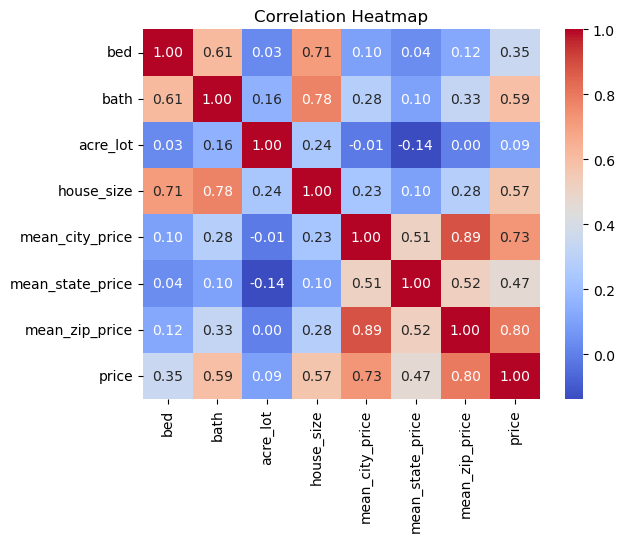

In [14]:
correlation_matrix = eda_df[['bed', 'bath', 'acre_lot', 'house_size', "mean_city_price", "mean_state_price", "mean_zip_price", 'price']].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

We see that `price` is most highly correlated to the mean city of the city and the zip code, as expected. The second most correlated variables are the number of baths and the house size, nothing rare.

Let's see a full pair plot, in logarithmic scale to have a better visualization, and using only a subsample of the data for lower resource usage.

/usr/local/anaconda3/envs/kaggle/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/anaconda3/envs/kaggle/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/anaconda3/envs/kaggle/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/anaconda3/envs/kaggle/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric 

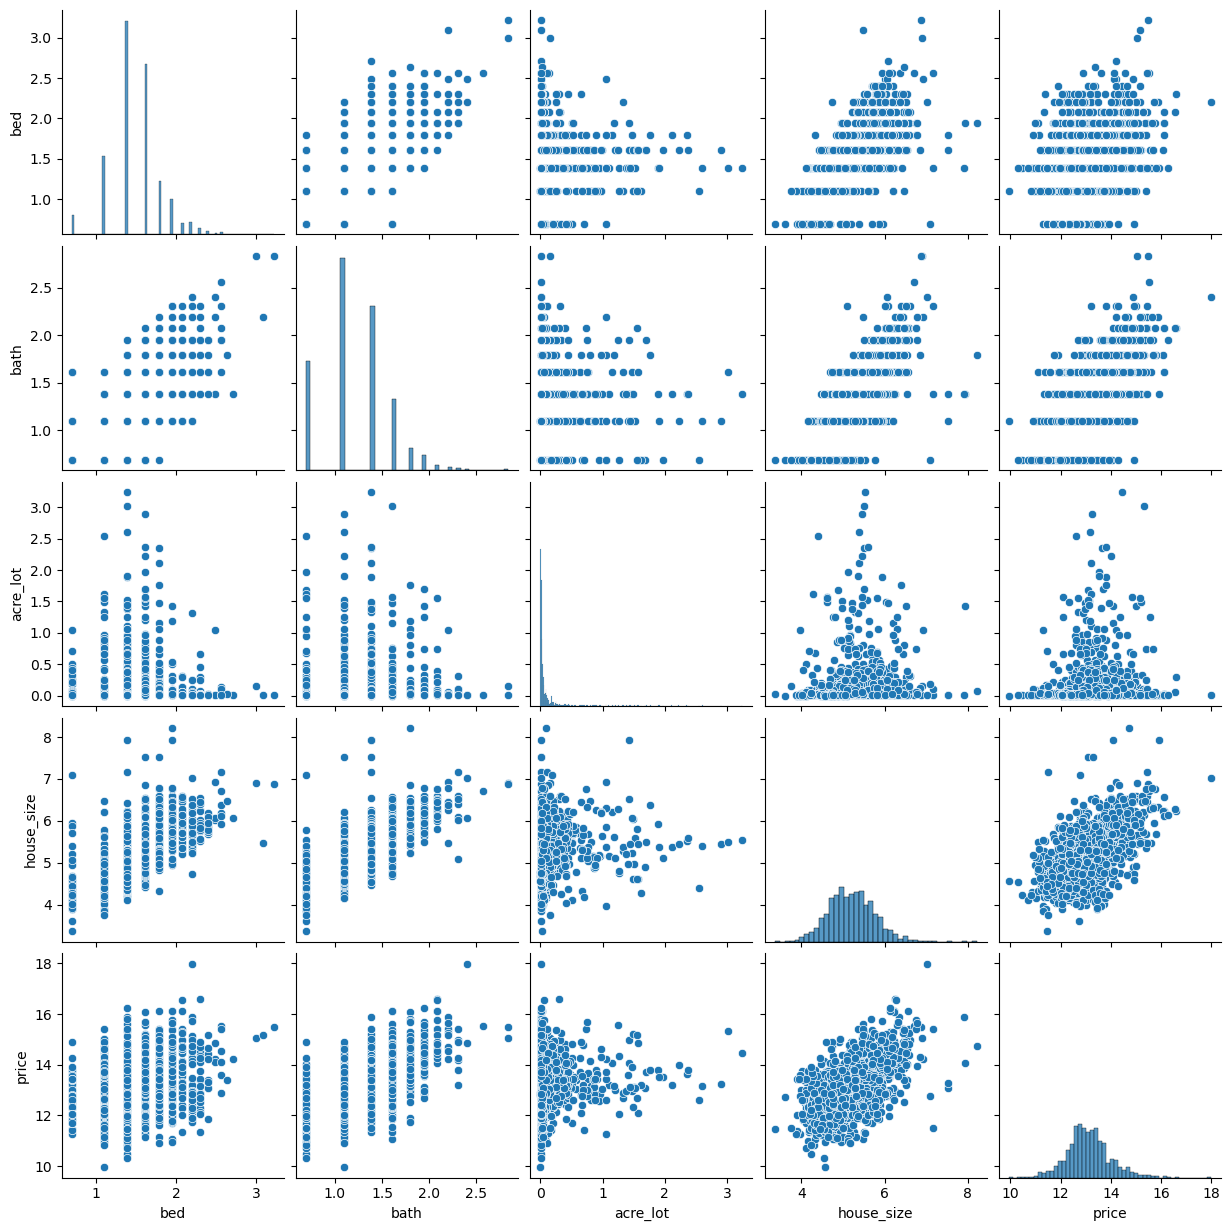

In [15]:
# Pairplot for numerical columns
NUM_SAMPLES = 2000
subset_df = eda_df.sample(NUM_SAMPLES, random_state=42)
subset_df
sns.pairplot(np.log(1. + subset_df[['bed', 'bath', 'acre_lot', 'house_size', 'price']]))
plt.show()

We see that the variables look a lot more Gaussian after the transformations, and we get the same relationships between the variables.

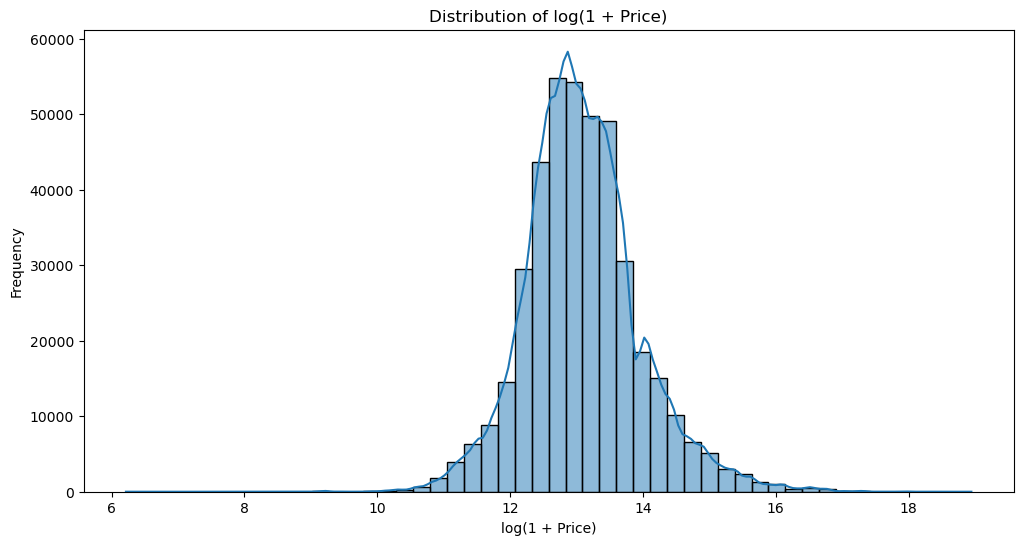

In [16]:
# Distribution of 'price'
plt.figure(figsize=(12, 6))
sns.histplot(np.log(1. + eda_df['price']), kde=True, bins=50)
plt.title('Distribution of log(1 + Price)')
plt.xlabel('log(1 + Price)')
plt.ylabel('Frequency')
plt.show()

This is a worthy transformation to improve the regressors performance using the mean squared error.

TypeError: Axes.boxplot() got an unexpected keyword argument 'log_scale'

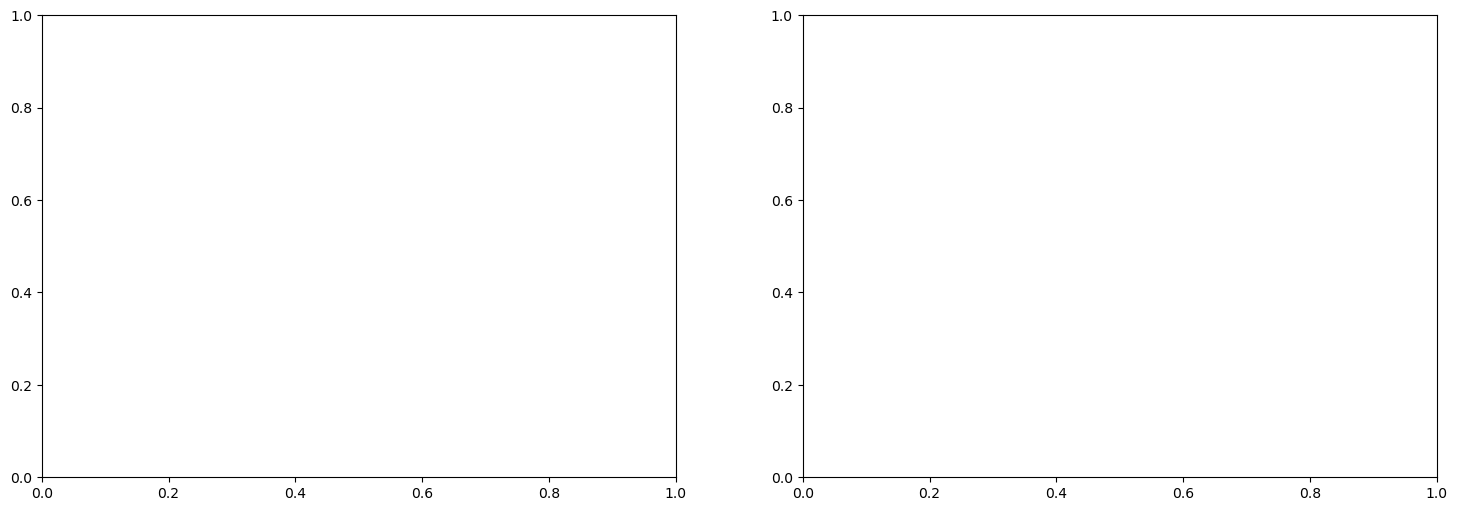

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(x='bed', y='price', data=eda_df, log_scale=True, ax=axes[0])
axes[0].set_title('Boxplot of Price vs Bed')

sns.boxplot(x='bath', y='price', data=eda_df, log_scale=True, ax=axes[1])
axes[1].set_title('Boxplot of Price vs Bath')

plt.tight_layout()
plt.show()

For a small number of beds and baths there are a lot examples with prices outside the interquartile range, but when the number gets high that behaviour stops.